In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

In [6]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
no_of_wines = df.shape[0]

qlty_gtr_6 = df.loc[(df['quality'] > 6)]
n_gtr_6 = qlty_gtr_6.shape[0]

qlty_less_5 = df.loc[(df['quality'] < 5)]
n_blw_5 = qlty_less_5.shape[0]

qlty_btw_5_and_6 = df.loc[(df['quality'] > 5) & (df['quality'] < 6)]
n_btw_5_and_6 = qlty_btw_5_and_6.shape[0]

qlty_gtr_6_percentile = (n_gtr_6 / no_of_wines) * 100

print(f"Total Number of wines: {no_of_wines}")
print(f"Number of wines with quality greater than 6: {n_gtr_6}")
print(f"Number of wines with quality less than 5: {n_blw_5}")
print(f"Number of wines with quality between 5 and 6: {n_btw_5_and_6}")
print(f"Percentage of wines with quality greater than 6: {qlty_gtr_6_percentile}")

Total Number of wines: 1599
Number of wines with quality greater than 6: 217
Number of wines with quality less than 5: 63
Number of wines with quality between 5 and 6: 0
Percentage of wines with quality greater than 6: 13.570981863664791


<AxesSubplot:xlabel='quality', ylabel='count'>

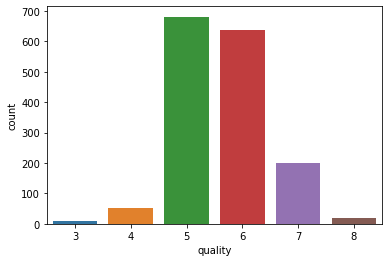

In [13]:
sns.countplot(x='quality', data=df)

In [ ]:
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (40,40), diagonal = 'kde')

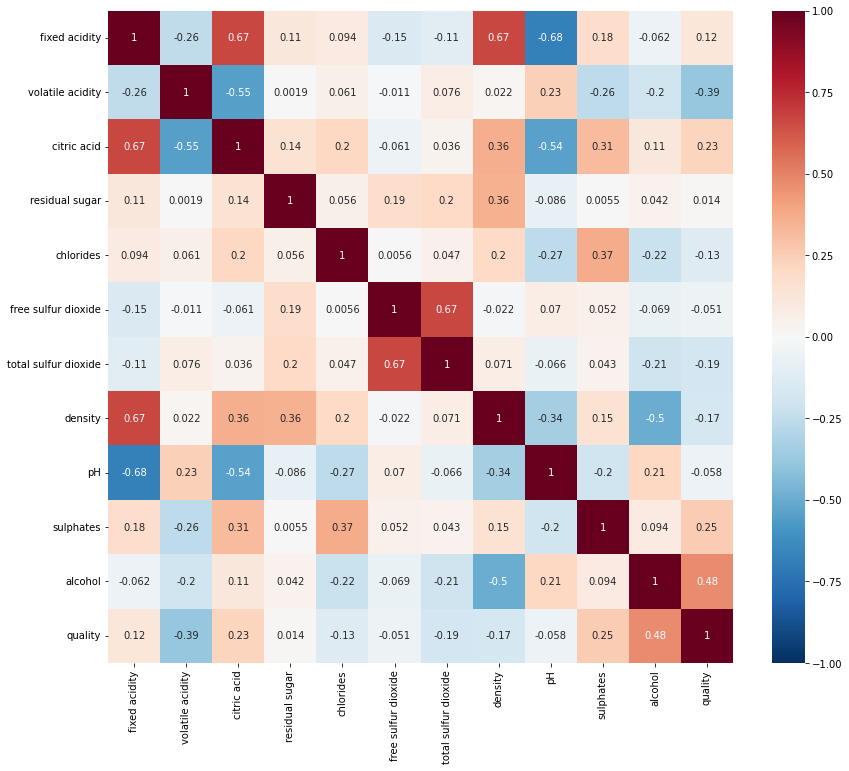

In [16]:
correlation_matrix = df.corr()
# correlation_matrix
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation_matrix, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

C:\Python310\lib\site-packages\seaborn\axisgrid.py:1667: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be remove

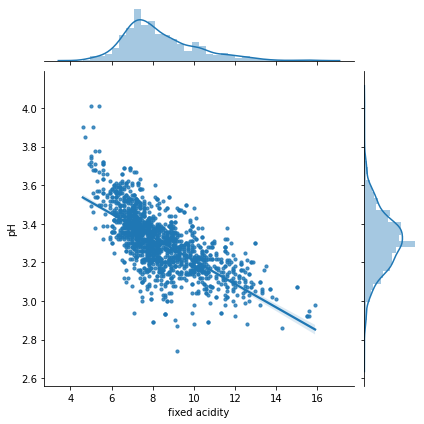

In [18]:
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=df[['pH', 'fixed acidity']], size=6)
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridA = gridA.plot_marginals(sns.distplot)